# 7. Features

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
# from skimage.metrics import structural_similarity as compare_ssim

In [2]:
def mse(A, B, ax=None):
    '''
    ax = 0: the average is performed along the row, for each column, returning an array
    ax = 1: the average is performed along the column, for each row, returning an array
    ax = None: the average is performed element-wise along the array, returning a scalar value
    '''
    return ((A - B)**2).mean(axis=ax)

In [3]:
def ssim(A, B):
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    return diff, score

## 7.1. Estimate Geometry

**7.1.1. The geometry of the attacked2 image (without image filtering-Folder Attack #2) should be reconstructed based
on the halftone version as a reference of the image and the attacked1 image (with image filters-Folder Attack
#1). For this aim, there is not any limitation for using available algorithms, functions, and toolbox. After estimating
the geometry of the candidate image, the transform matrix should be applied to the attacked2 image. Finally, the
measures including SSIM and MSE between original and reconstructed image should be reported. Also, the
number of matched points (MP) between images should be reported for each case.**

In [4]:
reference_color = cv2.imread('./Images/7/Reference.bmp')
reference_gray = cv2.cvtColor(reference_color, cv2.COLOR_BGR2GRAY)

original_color = cv2.imread('./Images/7/Original.bmp')
original_gray = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)

attack1_1_color = cv2.imread('./Images/7/Attack 1/1.bmp')
attack1_1_gray = cv2.cvtColor(attack1_1_color, cv2.COLOR_BGR2GRAY)

attack1_2_color = cv2.imread('./Images/7/Attack 1/2.bmp')
attack1_2_gray = cv2.cvtColor(attack1_2_color, cv2.COLOR_BGR2GRAY)

attack1_3_color = cv2.imread('./Images/7/Attack 1/3.bmp')
attack1_3_gray = cv2.cvtColor(attack1_3_color, cv2.COLOR_BGR2GRAY)

attack1_4_color = cv2.imread('./Images/7/Attack 1/4.bmp')
attack1_4_gray = cv2.cvtColor(attack1_4_color, cv2.COLOR_BGR2GRAY)

attack2_1_color = cv2.imread('./Images/7/Attack 2/1.bmp')
attack2_1_gray = cv2.cvtColor(attack2_1_color, cv2.COLOR_BGR2GRAY)

attack2_2_color = cv2.imread('./Images/7/Attack 2/2.bmp')
attack2_2_gray = cv2.cvtColor(attack2_2_color, cv2.COLOR_BGR2GRAY)

attack2_3_color = cv2.imread('./Images/7/Attack 2/3.bmp')
attack2_3_gray = cv2.cvtColor(attack2_3_color, cv2.COLOR_BGR2GRAY)

attack2_4_color = cv2.imread('./Images/7/Attack 2/4.bmp')
attack2_4_gray = cv2.cvtColor(attack2_4_color, cv2.COLOR_BGR2GRAY)

In [37]:
# def draw_matched_points(image, reference, image_pts, reference_pts):
#     feature_marked_image = np.copy(image)
#     feature_marked_reference = np.copy(reference)
#     num_matched_points = len(image_pts)
    
#     for i in range(num_matched_points):
#         image_x = image_pts[i][0][0]
#         image_y = image_pts[i][0][1]
        
#         reference_x = reference_pts[i][0][0]
#         reference_y = reference_pts[i][0][1]
        
#         cv2.circle(feature_marked_image, (int(image_y), int(image_x)), 3, (0, 0, 255), -1)
#         cv2.circle(feature_marked_reference, (int(reference_y), int(reference_x)), 3, (0, 0, 255), -1)
    
#     return feature_marked_image, feature_marked_reference

In [119]:
# def get_transform_matrix(image, reference):
    
#     image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     reference_gray = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
    
#     sift = cv2.SIFT_create()
#     image_keypoints, image_desciptor = sift.detectAndCompute(image_gray, None)
#     reference_keypoints, reference_desciptor = sift.detectAndCompute(reference_gray, None)

#     FLANN_INDEX_KDTREE = 0
#     index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#     search_params = dict(checks=50)

#     flann = cv2.FlannBasedMatcher(index_params,search_params)

#     matches = flann.knnMatch(image_desciptor, reference_desciptor, k=2)
#     print('no. Total Matched Points= ' + str(len(matches)))
    
# #     matches.sort(key=lambda x: x.distance, reverse=False)
# #     numGoodMatches = int(len(matches) * 0.15)
#     good_matches = []
# #     good_matches = matches[:numGoodMatches]

#     for m,n in matches:
#         if m.distance < 0.8 * n.distance:
#             good_matches.append(m)
            
#     imMatches = cv2.drawMatches(image, image_keypoints, reference, reference_keypoints, good_matches, None)
    
# #     cv2.imwrite("matches.jpg", imMatches)

    
#     image_pts = np.zeros((len(matches), 2), dtype=np.float32)
#     reference_pts = np.zeros((len(matches), 2), dtype=np.float32)

#     for i, match in enumerate(good_matches):
#         image_pts[i, :] = image_keypoints[match.queryIdx].pt
#         reference_pts[i, :] = reference_keypoints[match.trainIdx].pt

# #     image_pts = np.float32([ image_keypoints[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
# #     reference_pts = np.float32([ reference_keypoints[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
    
# #     feature_marked_image, feature_marked_reference = draw_matched_points(image, reference, image_pts, reference_pts)
    
#     print('image_pts.shape= ' + str(image_pts.shape))
# #     print('image_pts= ' + str(image_pts))
#     print('reference_pts.shape= ' + str(reference_pts.shape))
# #     print('reference_pts= ' + str(reference_pts))
    
#     num_matched_points = (len(good_matches))
#     print('no. Matched Points= ' + str(num_matched_points))
# #     print('good_matches[0]= ' + str(good_matches[0]))
    
#     homography_matrix, mask = cv2.findHomography(image_pts, reference_pts, cv2.RANSAC, 5.0)
# #     print('homography_matrix.shape= ' + str(homography_matrix.shape))
# #     print('homography_matrix.dtype= ' + str(homography_matrix.dtype))
# #     print('len(mask) = ' + str(len(mask)))
# #     print('len(mask[0]) = ' + str(len(mask[0])))
    
# #     return homography_matrix, feature_marked_image, feature_marked_reference, num_matched_points
#     return homography_matrix, num_matched_points

In [120]:
# def apply_transform(src, homography_matrix):
#     height, width = src.shape[0: 2]
# #     pts = np.float32([[0, 0], [0, height - 1], [width - 1, height - 1], [width - 1, 0]]).reshape(-1, 1, 4)
# #     dst = cv2.warpPerspective(pts, homography_matrix, (height, width))
#     dst = cv2.warpPerspective(src, homography_matrix, (height, width))
#     return dst

In [124]:
# def foo(src_color, reference_color, img_gray):
#     homography_matrix, src_num_matched_points = get_transform_matrix(src_color, reference_color)
#     transformed_img = apply_transform(img_gray, homography_matrix.T)
#     return transformed_img, src_num_matched_points

In [5]:
def get_transform_matrix(image1, image2):

    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(image1_gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2_gray, None)

    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    matches.sort(key=lambda x: x.distance, reverse=False)

    num_good_matches = int(len(matches) * 0.15)
    matches = matches[:num_good_matches]
    
    num_matches = len(matches)

    feature_matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)

    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    homography, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    return homography, num_matches, feature_matched_image

In [6]:
def match(query, reference, image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    homography, num_matches, feature_matched_image = get_transform_matrix(query, reference)
    matched_image = cv2.warpPerspective(image_gray, homography, (image_gray.shape[1], image_gray.shape[0]))
    return matched_image, feature_matched_image, num_matches

In [7]:
matched_attack1_1, feature_matched_attack1_1, attack1_1_num_matches = match(attack1_1_color, reference_color, attack2_1_color)
matched_attack1_2, feature_matched_attack1_2, attack1_2_num_matches = match(attack1_2_color, reference_color, attack2_2_color)
matched_attack1_3, feature_matched_attack1_3, attack1_3_num_matches = match(attack1_3_color, reference_color, attack2_3_color)
matched_attack1_4, feature_matched_attack1_4, attack1_4_num_matches = match(attack1_4_color, reference_color, attack2_4_color)

In [8]:
cv2.imwrite("./Output Images/7/feature_matched_attack1_1.bmp", feature_matched_attack1_1)
cv2.imwrite("./Output Images/7/feature_matched_attack1_2.bmp", feature_matched_attack1_2)
cv2.imwrite("./Output Images/7/feature_matched_attack1_3.bmp", feature_matched_attack1_3)
cv2.imwrite("./Output Images/7/feature_matched_attack1_4.bmp", feature_matched_attack1_4)

True

In [ ]:
# cv2.imwrite("./Output Images/7/matched_attack1_1.bmp", matched_attack1_1)
# cv2.imwrite("./Output Images/7/matched_attack1_2.bmp", matched_attack1_2)
# cv2.imwrite("./Output Images/7/matched_attack1_3.bmp", matched_attack1_3)
# cv2.imwrite("./Output Images/7/matched_attack1_4.bmp", matched_attack1_4)

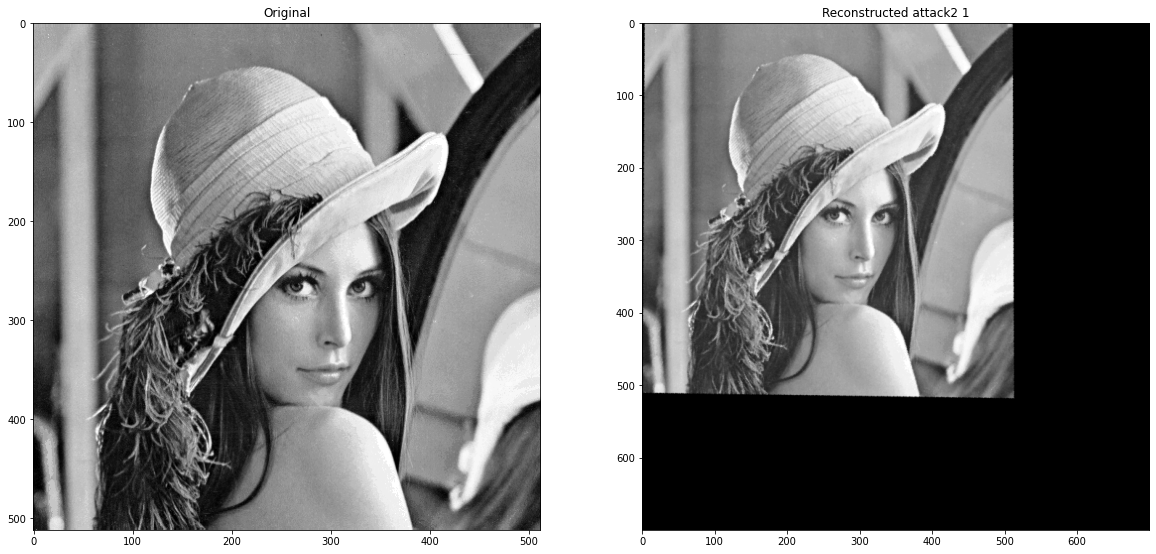

In [9]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
plt.imshow(original_gray, cmap='gray')
plt.title("Original")


plt.subplot(1, 2, 2)
plt.imshow(matched_attack1_1, cmap='gray')
plt.title("Reconstructed attack2 1")

plt.show()

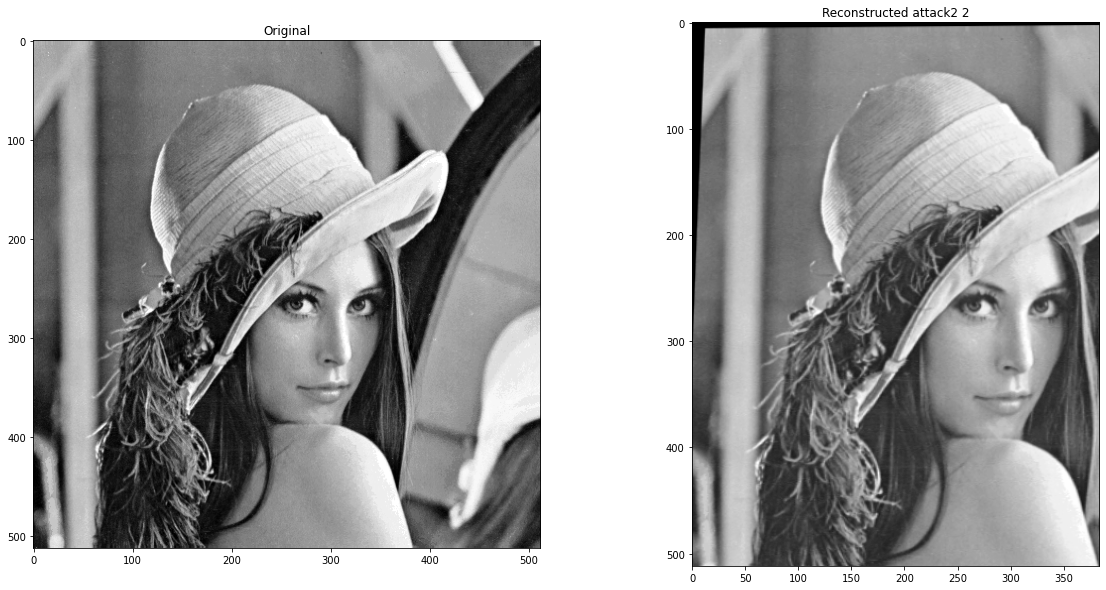

In [10]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
plt.imshow(original_gray, cmap='gray')
plt.title("Original")


plt.subplot(1, 2, 2)
plt.imshow(matched_attack1_2, cmap='gray')
plt.title("Reconstructed attack2 2")

plt.show()

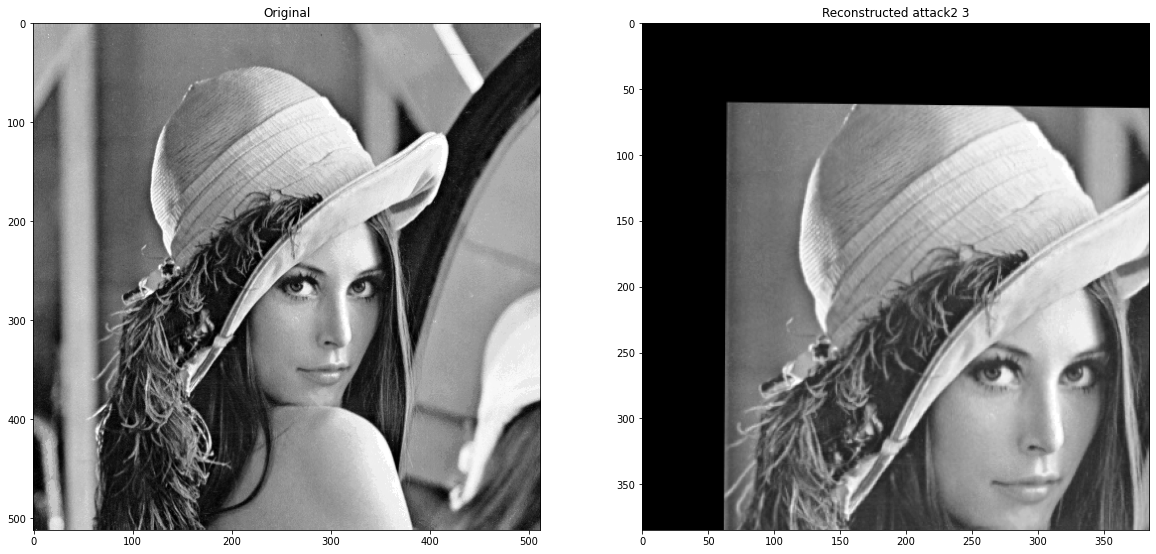

In [11]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
plt.imshow(original_gray, cmap='gray')
plt.title("Original")


plt.subplot(1, 2, 2)
plt.imshow(matched_attack1_3, cmap='gray')
plt.title("Reconstructed attack2 3")

plt.show()

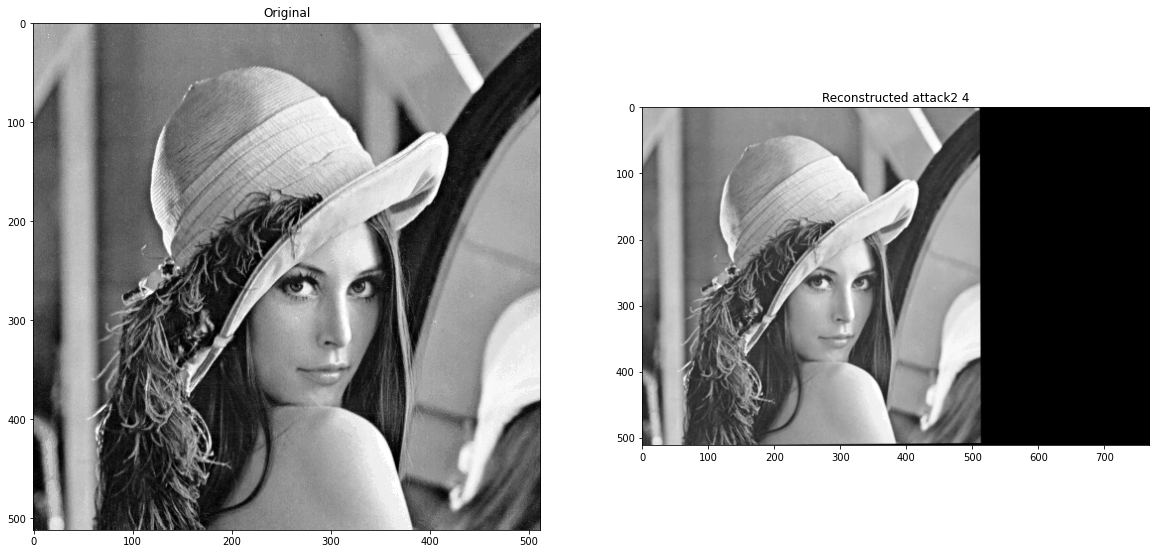

In [12]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
plt.imshow(original_gray, cmap='gray')
plt.title("Original")


plt.subplot(1, 2, 2)
plt.imshow(matched_attack1_4, cmap='gray')
plt.title("Reconstructed attack2 4")

plt.show()

In [ ]:
import statistics

mean_ssim = None
std_ssim = None

mean_mse = None
std_mse = None

mean_mp = statistics.mean((attack1_1_num_matches, attack1_2_num_matches, attack1_3_num_matches, attack1_4_num_matches))
std_mp = statistics.stddev([attack1_1_num_matches, attack1_2_num_matches, attack1_3_num_matches, attack1_4_num_matche])

###### Report MSE & SSIM & Mtched Points

In [115]:
data = {'SSIM': [None, None, None, None, None, None],
        'MSE': [None, None, None, None, None, None],
        'MP': [attack1_1_num_matches, attack1_2_num_matches, attack1_3_num_matches, attack1_4_num_matches, mean_mp, std_mp]
        }

index = ['Type1(Histeq)', 'Type2(Sharpen)', 'Type3(Gaussfilt)', 'Type4(Bilatfilt)', 'Mean', 'STD']
df = pd.DataFrame(data, index=index)

13.370234489440918


In [ ]:
df.head()

## 7.2. Corner Detection

**7.2.1. Implement the Harris corner detector algorithm on the image Building. Superimpose the corner points on to the
relevant pixels in the image. It is suggested that you choose a suitable threshold to pick up the interest points,
followed by a non-maximal suppression step.**

In [7]:
src_path = './Images/7/Building.jpg'
src_color = cv2.imread(src_path)
src_gray = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)

In [29]:
blue = src_color[:, :, 0]
green = src_color[:, :, 1]
red = src_color[:, :, 2]
src_rgb = cv2.merge((red, green, blue))

In [11]:
# Compute Gaussian derivatives at each pixel
kernel_gauss = np.array(([1 / 16, 2 / 16, 1 / 16], [2 / 16, 4 / 16, 2 / 16], [1 / 16, 2 / 16, 1 / 16]), dtype="float64")
filtered_src = signal.convolve2d(src_gray, kernel_gauss, mode='same')

In [12]:
# Compute second moment matrix M in a Gaussian window around each pixel
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Ix = signal.convolve2d(filtered_src, kernel_sobel_x, mode='same')
Iy = signal.convolve2d(filtered_src, kernel_sobel_y, mode='same')

Ix2 = np.square(Ix)
Iy2 = np.square(Iy)
IxIy = Ix*Iy

g_Ix2 = signal.convolve2d(Ix2, kernel_gauss, mode='same')
g_Iy2 = signal.convolve2d(Iy2, kernel_gauss, mode='same')
g_IxIy = signal.convolve2d(IxIy, kernel_gauss, mode='same')

In [13]:
# Compute corner response function R
alpha = 0.05
R = g_Ix2 * g_Iy2 - np.square(g_IxIy) - alpha * np.square(g_Ix2 + g_Iy2)

In [14]:
# Threshold R
cv2.normalize(R, R, 0, 1, cv2.NORM_MINMAX)

threshold = 0.5
loc = np.where(R >= threshold)
key_points = []
for pt in zip(*loc[::-1]):
    key_points.append((pt[1], pt[0]))

In [38]:
# Find local maxima of response function (non-maximum suppression)
corner_detected_image = np.copy(src_color)
for kp in key_points:
    row = kp[0]
    col = kp[1]
    if R[row, col] > 0:
        cv2.circle(corner_detected_image, (col, row), 3, (0, 0, 255), -1)

In [42]:
cv2.imwrite('./Output Images/7/corner_detected_Building.jpg', corner_detected_image)

True

In [40]:
blue = corner_detected_image[:, :, 0]
green = corner_detected_image[:, :, 1]
red = corner_detected_image[:, :, 2]
rgb = cv2.merge((red, green, blue))

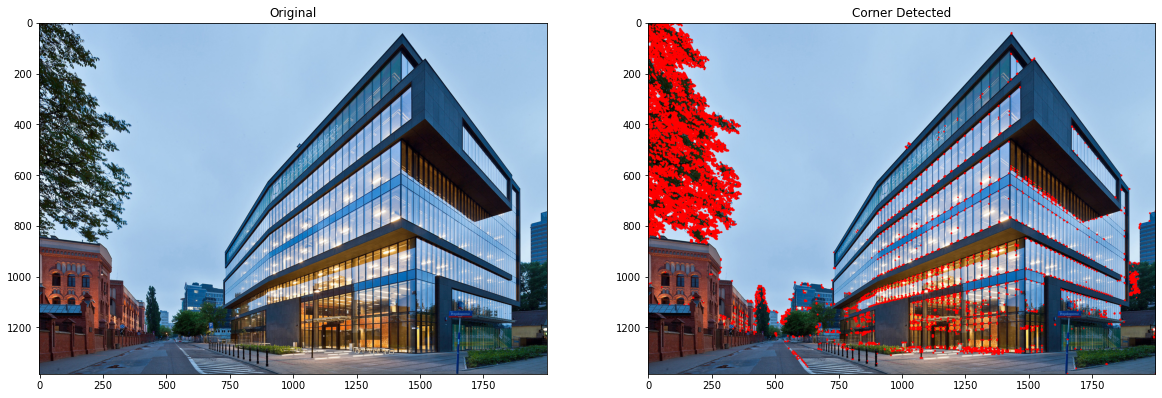

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rgb)
plt.title("Corner Detected")

plt.show()

## Resources

1. https://stackoverflow.com/a/65790734/9919907
2. https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/
3. https://stackoverflow.com/questions/37363875/matlab-transformpointsforward-equivalent-in-python
4. https://stackoverflow.com/questions/43157092/applying-transformation-matrix-to-a-list-of-points-in-opencv-python
5. https://docs.opencv.org/4.5.3/d4/d61/tutorial_warp_affine.html
6. https://answers.opencv.org/question/1309/apply-homography-to-image/
7. https://www.pythonpool.com/cv2-findhomography/
8. https://medium.com/acmvit/how-to-project-an-image-in-perspective-view-of-a-background-image-opencv-python-d101bdf966bc
9. https://theailearner.com/tag/cv2-warpperspective/
10. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
11. https://docs.opencv.org/3.4.15/d4/d5d/group__features2d__draw.html
12. https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/
13. https://learnopencv.com/feature-based-image-alignment-using-opencv-c-python/
14. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html
15. https://www.geeksforgeeks.org/python-statistics-mean-function/
16. https://www.geeksforgeeks.org/python-statistics-stdev/#:~:text=Statistics%20module%20in%20Python%20provides,rather%20than%20an%20entire%20population.
17. https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/
18. https://stackoverflow.com/questions/54589296/how-do-i-compare-ssim-between-one-image-and-many-others-using-python